# HR Analytics - Logistic Regression Model

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [415]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [416]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
5888,0.74,0.51,5,258,2,0,0,0,sales,low


In [417]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [418]:
df.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [420]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## EDA

In [421]:
null_val = df.isnull().sum()
print("Null Values in the Dataset: \n")
print(null_val)

Null Values in the Dataset: 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [422]:
ret_dist = df['left'].value_counts()
print("Retention Distribution: \n")
print(ret_dist)

Retention Distribution: 

left
0    11428
1     3571
Name: count, dtype: int64


In [423]:
sal_ret = df.groupby(['salary', 'left']).size().unstack(fill_value=0)
print("Impact of Salary on Retention: \n")
print(sal_ret)

Impact of Salary on Retention: 

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


In [424]:
dep_ret = df.groupby(['Department', 'left']).size().unstack(fill_value=0)
print("Correlation b/w Department and Retention: \n")
print(dep_ret)

Correlation b/w Department and Retention: 

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


## Data Visualization

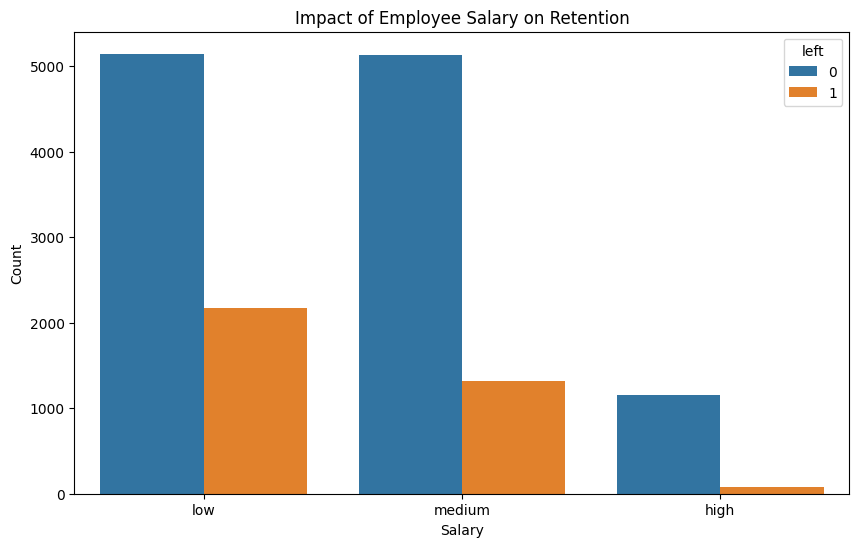

In [425]:
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Employee Salary on Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

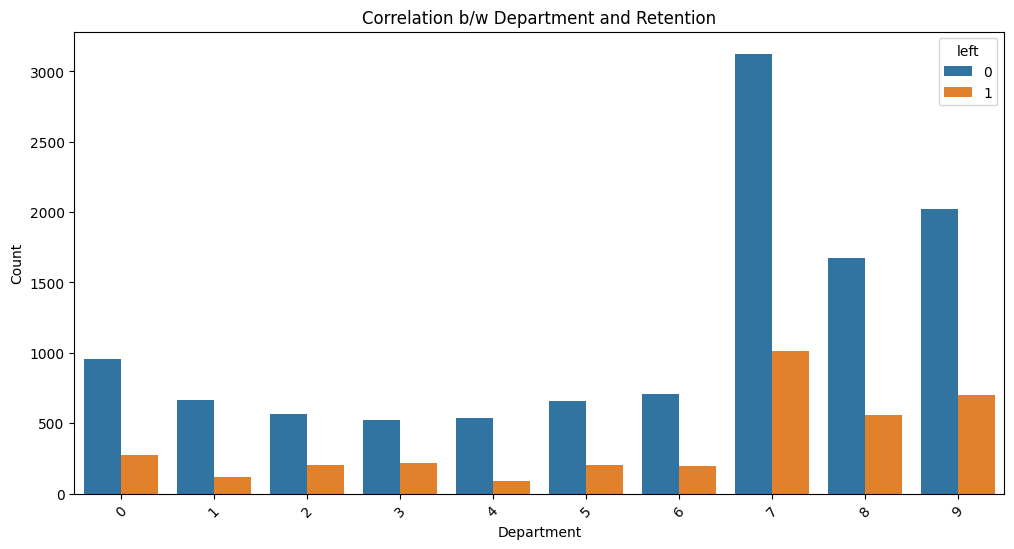

In [450]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Correlation b/w Department and Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

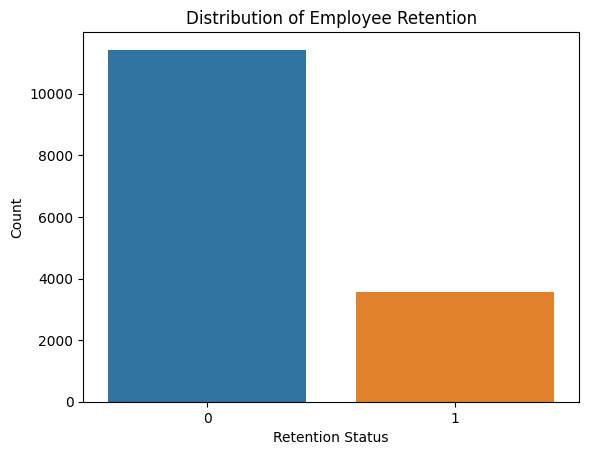

In [427]:
sns.countplot(x='left', data=df)
plt.title('Distribution of Employee Retention')
plt.xlabel('Retention Status')
plt.ylabel('Count')
plt.show()

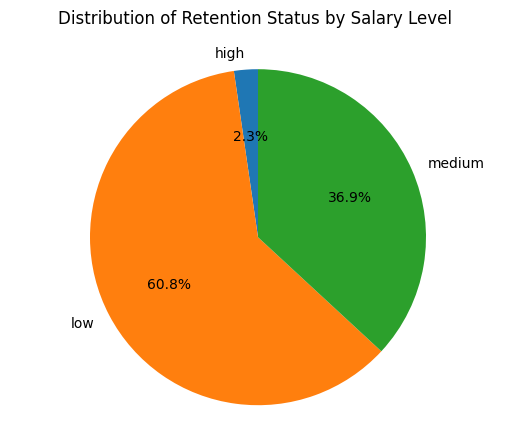

In [428]:
sal_ret = df.groupby(['salary', 'left']).size().unstack()
fig, ax = plt.subplots()
ax.pie(sal_ret[1], labels=sal_ret.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Retention Status by Salary Level \n')
plt.show()

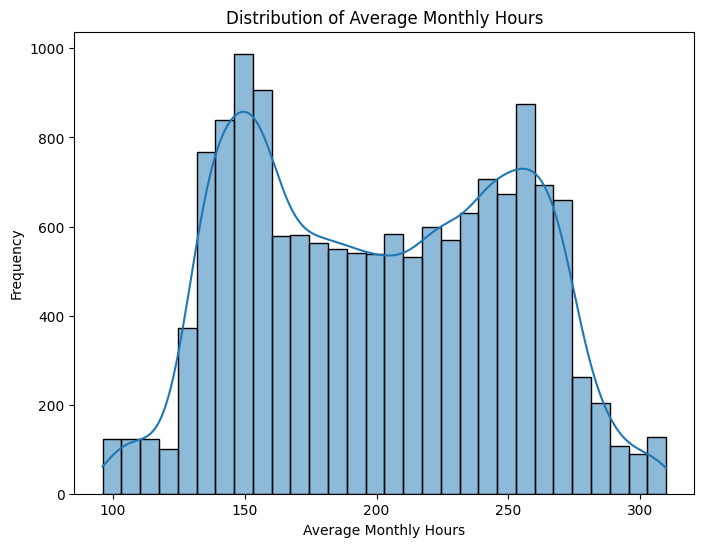

In [429]:
plt.figure(figsize=(8, 6))
sns.histplot(df['average_montly_hours'], bins=30, kde=True)
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

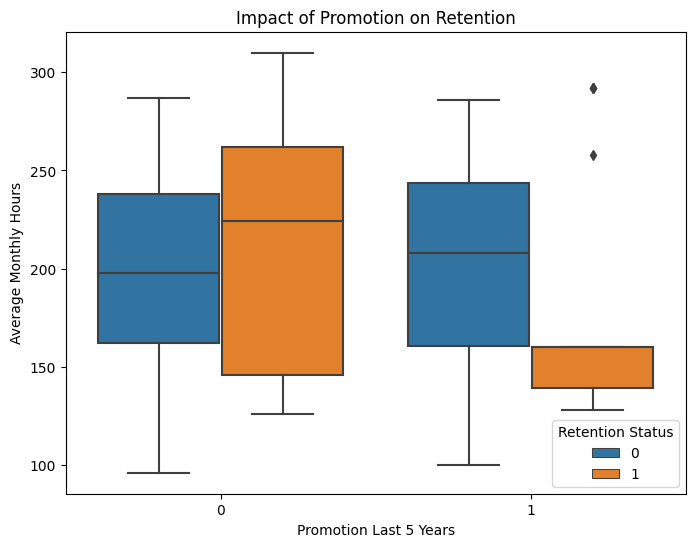

In [430]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion_last_5years', y='average_montly_hours', hue='left', data=df)
plt.title('Impact of Promotion on Retention')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Retention Status')
plt.show()

## Data Processing

In [431]:
df.drop(['last_evaluation', 'number_project' ,'average_montly_hours'], inplace = True, axis = 1 )
df.head()

,satisfaction_level,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,3,0,1,0,sales,low
1,0.80,6,0,1,0,sales,medium
2,0.11,4,0,1,0,sales,medium
3,0.72,5,0,1,0,sales,low
4,0.37,3,0,1,0,sales,low


In [432]:
encoder = LabelEncoder()
df['Department'] = encoder.fit_transform(df['Department'])
df['salary'] = encoder.fit_transform(df['salary'])
df.head()

,satisfaction_level,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,3,0,1,0,7,1
1,0.80,6,0,1,0,7,2
2,0.11,4,0,1,0,7,2
3,0.72,5,0,1,0,7,1
4,0.37,3,0,1,0,7,1


## Data Spliting

In [433]:
x = df.drop('left', axis=1)
y = df['left']

In [434]:
x

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,3,0,0,7,1
1,0.80,6,0,0,7,2
2,0.11,4,0,0,7,2
3,0.72,5,0,0,7,1
4,0.37,3,0,0,7,1
...,...,...,...,...,...,...
14994,0.40,3,0,0,8,1
14995,0.37,3,0,0,8,1
14996,0.37,3,0,0,8,1
14997,0.11,4,0,0,8,1


In [435]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [436]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [437]:
x_train

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,Department,salary
12602,0.10,4,0,0,6,1
4889,0.57,3,1,0,4,2
1572,0.39,3,0,0,9,1
13375,0.91,4,0,0,0,2
879,0.82,5,0,0,9,2
...,...,...,...,...,...,...
5191,0.52,3,0,0,8,1
13418,0.49,7,0,0,7,2
5390,0.66,2,0,0,8,2
860,0.79,5,0,0,7,1


In [438]:
x_test

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6723,0.65,2,1,0,5,2
6473,0.88,2,0,0,0,1
4679,0.69,2,0,0,7,1
862,0.41,3,0,0,7,1
7286,0.87,2,1,0,3,1
...,...,...,...,...,...,...
13388,0.85,3,0,0,6,2
10463,0.21,3,0,0,5,1
5331,0.78,3,0,0,6,1
7499,0.93,2,0,0,7,2


In [439]:
y_train

12602    1
4889     0
1572     1
13375    0
879      1
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 10499, dtype: int64

In [440]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
13388    0
10463    0
5331     0
7499     0
11796    0
Name: left, Length: 4500, dtype: int64

## Building Model

In [441]:
lr = LogisticRegression()

In [442]:
lr.fit(x_train, y_train)

LogisticRegression()

In [443]:
# import warnings
# warnings.filterwarnings("ignore")

In [444]:
y_pred = lr.predict(x_test)

In [445]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [446]:
len(y_pred)

4500

## Model Evaluation

In [447]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7575555555555555


In [448]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n")
print(conf_matrix)

Confusion Matrix: 

[[3148  280]
 [ 811  261]]


In [449]:
class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

